In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

def generate_uniform_points(left, right, n = 10 ** 5):
    from random import uniform
    tab = []
    for i in range(n):
        x=uniform(left, right)
        y=uniform(left, right)
        tab.append((x, y))
    return tab

def generate_circle_points(O, R, n = 1000):
    from random import uniform
    from math import pi, cos, sin
    tab = []
    for i in range(n):
        t = uniform(0, 2*pi)
        x = R*cos(t) + O[0]
        y = R*sin(t) + O[1]
        tab.append((x, y))
    return tab

def generate_collinear_points(a, b, n=1000):
    from random import uniform
    tab = []
    for i in range(n):
        x = uniform(a[0], b[0]) 
        y = x*((a[1]-b[1])/(a[0]-b[0]))+a[1]-a[0]*((a[1]-b[1])/(a[0]-b[0]))
        tab.append((x, y))
    return tab

def mat_det_3x3(a, b, c):
    return (a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1])

def mat_det_3x3_lib(a, b, c):
    array = np.array([[a[0], a[1], 1], 
                      [b[0], b[1], 1], 
                      [c[0], c[1], 1]]) 
  
    return np.linalg.det(array) 

def mat_det_2x2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

def mat_det_2x2_lib(a, b, c):
    array = np.array([[a[0]-c[0], a[1]-c[1]], 
                      [b[0]-c[0], b[1]-c[1]]]) 
  
    return np.linalg.det(array) 

def categorize_points(points, a, b, mat_det_func, eps):
    tab_left = []
    tab = []
    tab_right = []
    for point in points:
        if mat_det_func(a, b, point) < -eps:
            tab_right.append(point)
        elif mat_det_func(a, b, point) > eps:
            tab_left.append(point)
        else:
            tab.append(point)
    return tab_left, tab, tab_right

a = (-1.0, 0.0)
b = (1.0, 0.1)


Uniform points

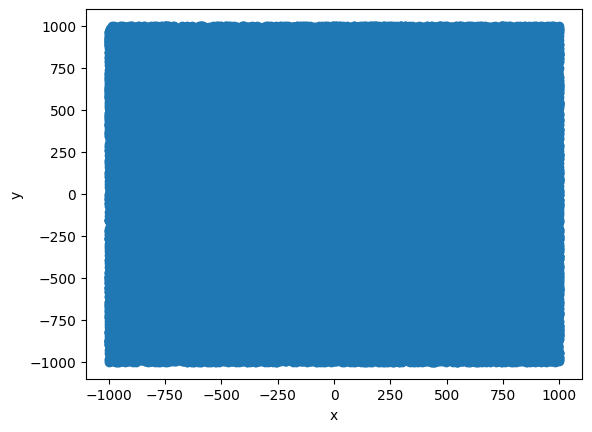

In [2]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Uniform points 2

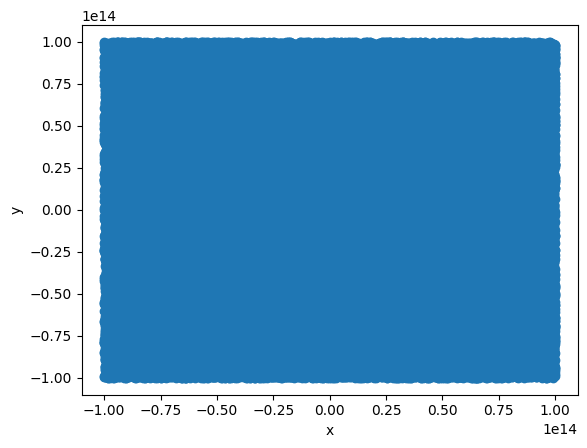

In [18]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)
vis.clear()
vis.add_point(points_b)
vis.show()

Uniform points circle

[(-75.68165479777747, -65.36273500298199), (-35.53835323020436, 93.47205705281779), (62.7319105987876, 77.87623124308033), (23.571715948260497, 97.18217021272227), (95.06202569395849, -31.035645167471188), (76.64796833139678, 64.22685536961306), (-95.88165150878542, -28.402621427393367), (32.8584302374489, -94.44746456274358)]


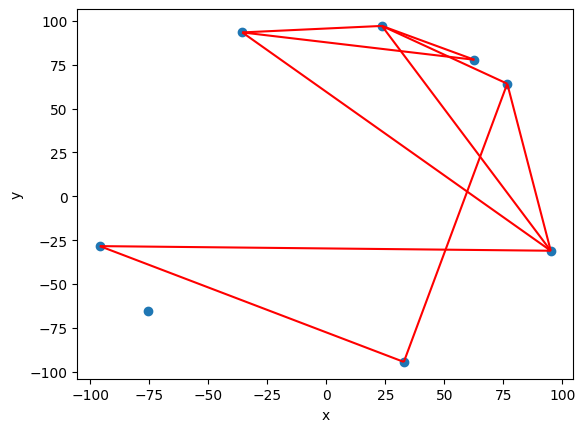

In [17]:
points_c = generate_circle_points((0, 0), 100,8)
vis.clear()
edges = [(1, 2), (1, 4), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7)]
vis.add_point(points_c)
print(points_c)
for edge in edges:
    vis.add_line_segment([points_c[edge[0]],points_c[edge[1]]],color='red')
vis.show()


Uniform points line

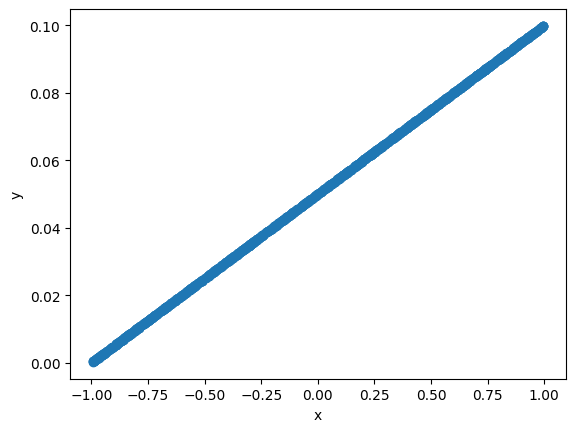

In [20]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))
vis.clear()
vis.add_point(points_d)
vis.show()

Distribution 1

Without visualization: 0.6606676578521729 seconds
With visualization: 0.6950292587280273 seconds
Left points: 50194
Mid points: 0
Right points: 49806


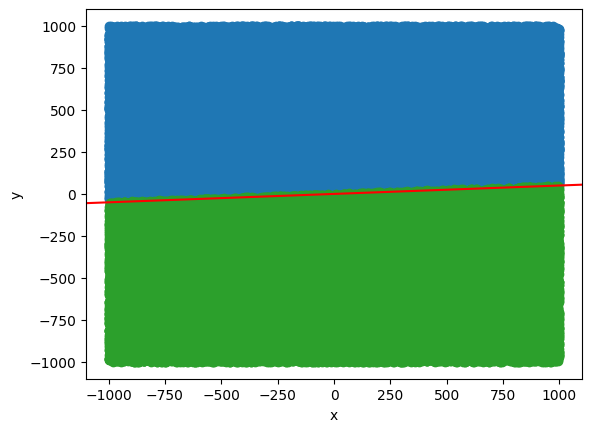

In [34]:
import time
start_time = time.time()
points_a_left,points_a_mid,points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -12)
print("Without visualization:", time.time() - start_time, "seconds")
line = (a,b)
vis.clear()
vis.add_point(points_a_left)
vis.add_point(points_a_mid)
vis.add_point(points_a_right)
vis.add_line(line, color='red')
vis.show()
print("With visualization:", time.time() - start_time, "seconds")
print("Left points:",len(points_a_left))
print("Mid points:",len(points_a_mid))
print("Right points:", len(points_a_right))

Distribution 2

Without visualization: 0.06325864791870117 seconds
With visualization: 0.09787392616271973 seconds
Left points: 49825
Mid points: 0
Right points: 50175


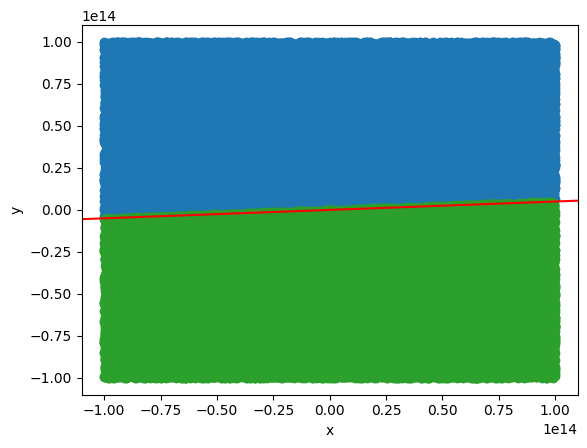

In [22]:
import time
start_time = time.time()
points_b_left,points_b_mid,points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)
print("Without visualization:", time.time() - start_time, "seconds")
line = (a,b)
vis.clear()
vis.add_point(points_b_left)
vis.add_point(points_b_mid)
vis.add_point(points_b_right)
vis.add_line(line, color='red')
vis.show()
print("With visualization:", time.time() - start_time, "seconds")
print("Left points:",len(points_b_left))
print("Mid points:",len(points_b_mid))
print("Right points:", len(points_b_right))

Distribution circle

Left points: 507
Mid points: 0
Right points: 493


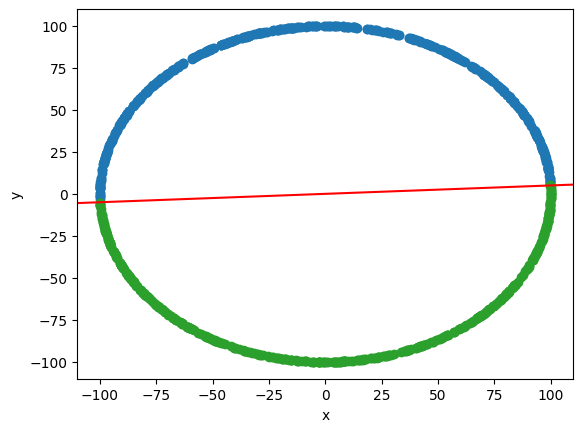

In [23]:
points_c_left,points_c_mid,points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)
line = (a,b)
vis.clear()
vis.add_point(points_c_left)
vis.add_point(points_c_mid)
vis.add_point(points_c_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_c_left))
print("Mid points:",len(points_c_mid))
print("Right points:", len(points_c_right))

Distribution line

Left points: 86
Mid points: 865
Right points: 49


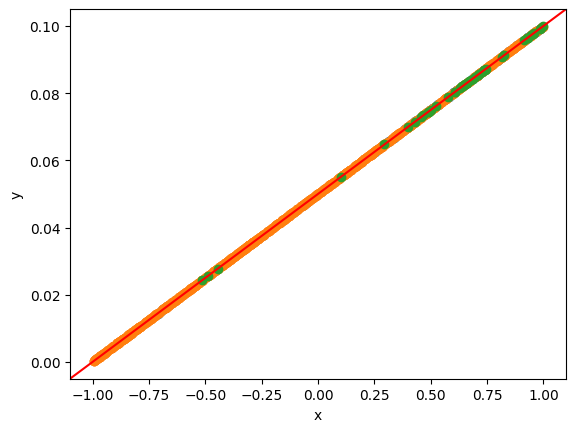

In [24]:
points_d_left,points_d_mid,points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -17)
line = (a,b)
vis.clear()
vis.add_point(points_d_left)
vis.add_point(points_d_mid)
vis.add_point(points_d_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_d_left))
print("Mid points:",len(points_d_mid))
print("Right points:", len(points_d_right))


Left points: 197
Mid points: 797
Right points: 6


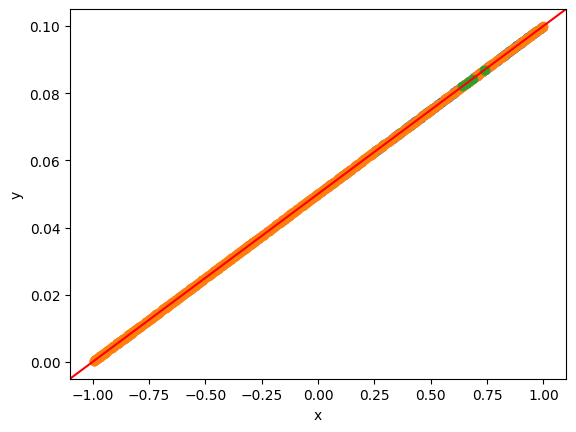

In [25]:
points_d_left,points_d_mid,points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -17)
line = (a,b)
vis.clear()
vis.add_point(points_d_left)
vis.add_point(points_d_mid)
vis.add_point(points_d_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_d_left))
print("Mid points:",len(points_d_mid))
print("Right points:", len(points_d_right))

Left points: 113
Mid points: 832
Right points: 55


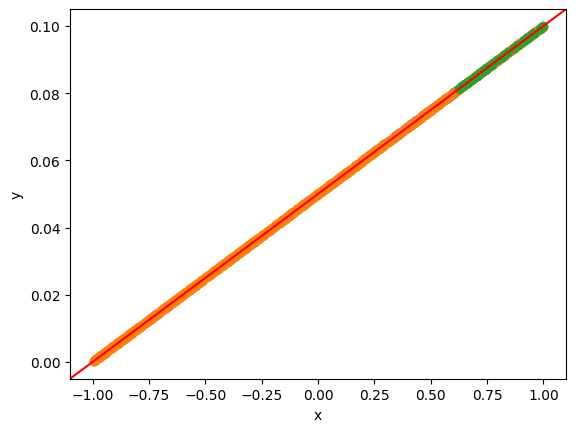

In [26]:
points_d_left,points_d_mid,points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -17)
line = (a,b)
vis.clear()
vis.add_point(points_d_left)
vis.add_point(points_d_mid)
vis.add_point(points_d_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_d_left))
print("Mid points:",len(points_d_mid))
print("Right points:", len(points_d_right))

Left points: 98
Mid points: 849
Right points: 53


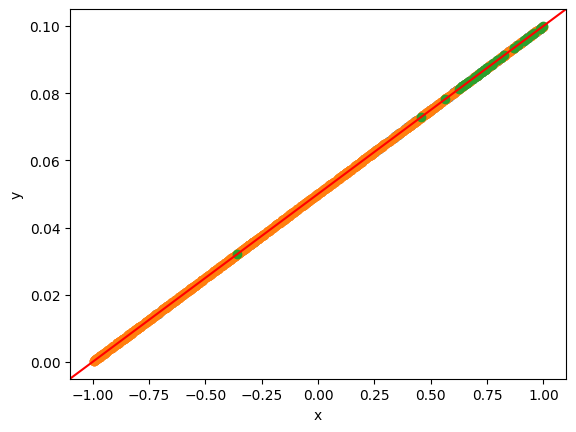

In [27]:
points_d_left,points_d_mid,points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -17)
line = (a,b)
vis.clear()
vis.add_point(points_d_left)
vis.add_point(points_d_mid)
vis.add_point(points_d_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_d_left))
print("Mid points:",len(points_d_mid))
print("Right points:", len(points_d_right))

In [28]:
points_d_float32 = np.float32(points_d)

Left points: 0
Mid points: 1000
Right points: 0


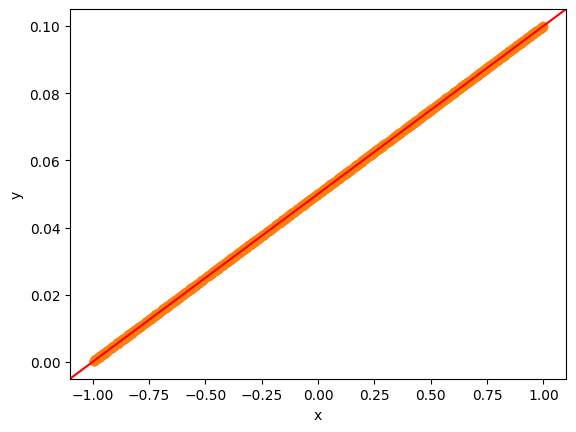

In [31]:
points_d_left,points_d_mid,points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -8)
line = (a,b)
vis.clear()
vis.add_point(points_d_left)
vis.add_point(points_d_mid)
vis.add_point(points_d_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_d_left))
print("Mid points:",len(points_d_mid))
print("Right points:", len(points_d_right))

Left points: 377
Mid points: 237
Right points: 386


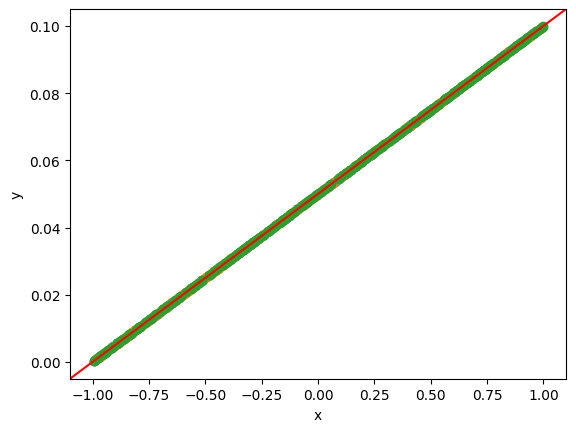

In [30]:
points_d_left,points_d_mid,points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -9)
line = (a,b)
vis.clear()
vis.add_point(points_d_left)
vis.add_point(points_d_mid)
vis.add_point(points_d_right)
vis.add_line(line, color='red')
vis.show()
print("Left points:",len(points_d_left))
print("Mid points:",len(points_d_mid))
print("Right points:", len(points_d_right))